### Lusaka Mobility Prediction Hackathon Starter Notebook
This is a simple starter notebook to help you get started for the hackathon



In [1]:
%%capture
# Install relevant libraries
!pip install geopandas folium

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm
import ast

import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
import folium

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)


## Loading and previewing data

In [4]:
DATA_PATH = ''
# Load files
train = pd.read_csv(os.path.join(DATA_PATH, 'Train.csv'))
test = pd.read_csv(os.path.join(DATA_PATH, 'Test.csv'))
samplesubmission = pd.read_csv(os.path.join(DATA_PATH, 'SampleSubmission.csv'))
graph_df = pd.read_csv(os.path.join(DATA_PATH, 'Graph.csv'))

# Preview train dataset
train.head()

,ID,persistent_id,day,prediction_type,count_norm_00_0_,count_norm_00_1_,count_norm_00_2_,count_norm_00_3_,count_norm_01_0_,count_norm_01_1_,count_norm_01_2_,count_norm_01_3_,count_norm_02_0_,count_norm_02_1_,count_norm_02_2_,count_norm_02_3_,count_norm_03_0_,count_norm_03_1_,count_norm_03_2_,count_norm_03_3_,count_norm_04_0_,count_norm_04_1_,count_norm_04_2_,count_norm_04_3_,count_norm_05_0_,count_norm_05_1_,count_norm_07_2_,count_norm_07_3_,count_norm_08_0_,count_norm_08_1_,count_norm_08_2_,count_norm_08_3_,count_norm_09_0_,count_norm_09_1_,count_norm_09_2_,count_norm_09_3_,count_norm_10_0_,count_norm_10_1_,count_norm_10_2_,count_norm_10_3_,count_norm_11_0_,count_norm_11_1_,count_norm_11_2_,count_norm_11_3_,count_norm_12_0_,count_norm_12_1_,count_norm_12_2_,count_norm_12_3_,count_norm_13_0_,count_norm_13_1_,count_norm_13_2_,count_norm_13_3_,count_norm_14_0_,count_norm_14_1_,count_norm_14_2_,count_norm_14_3_,count_norm_15_0_,count_norm_15_1_,count_norm_15_2_,count_norm_15_3_,count_norm_16_0_,count_norm_16_1_,count_norm_16_2_,count_norm_16_3_,count_norm_17_0_,count_norm_17_1_,count_norm_19_2_,count_norm_19_3_,count_norm_20_0_,count_norm_20_1_,count_norm_20_2_,count_norm_20_3_,count_norm_21_0_,count_norm_21_1_,count_norm_21_2_,count_norm_21_3_,count_norm_22_0_,count_norm_22_1_,count_norm_22_2_,count_norm_22_3_,count_norm_23_0_,count_norm_23_1_,count_norm_23_2_,count_norm_23_3_,speed_avg_00_0_,speed_avg_00_1_,speed_avg_00_2_,speed_avg_00_3_,speed_avg_01_0_,speed_avg_01_1_,speed_avg_01_2_,speed_avg_01_3_,speed_avg_02_0_,speed_avg_02_1_,speed_avg_02_2_,speed_avg_02_3_,speed_avg_03_0_,speed_avg_03_1_,speed_avg_03_2_,speed_avg_03_3_,speed_avg_04_0_,speed_avg_04_1_,speed_avg_04_2_,speed_avg_04_3_,speed_avg_05_0_,speed_avg_05_1_,speed_avg_07_2_,speed_avg_07_3_,speed_avg_08_0_,speed_avg_08_1_,speed_avg_08_2_,speed_avg_08_3_,speed_avg_09_0_,speed_avg_09_1_,speed_avg_09_2_,speed_avg_09_3_,speed_avg_10_0_,speed_avg_10_1_,speed_avg_10_2_,speed_avg_10_3_,speed_avg_11_0_,speed_avg_11_1_,speed_avg_11_2_,speed_avg_11_3_,speed_avg_12_0_,speed_avg_12_1_,speed_avg_12_2_,speed_avg_12_3_,speed_avg_13_0_,speed_avg_13_1_,speed_avg_13_2_,speed_avg_13_3_,speed_avg_14_0_,speed_avg_14_1_,speed_avg_14_2_,speed_avg_14_3_,speed_avg_15_0_,speed_avg_15_1_,speed_avg_15_2_,speed_avg_15_3_,speed_avg_16_0_,speed_avg_16_1_,speed_avg_16_2_,speed_avg_16_3_,speed_avg_17_0_,speed_avg_17_1_,speed_avg_19_2_,speed_avg_19_3_,speed_avg_20_0_,speed_avg_20_1_,speed_avg_20_2_,speed_avg_20_3_,speed_avg_21_0_,speed_avg_21_1_,speed_avg_21_2_,speed_avg_21_3_,speed_avg_22_0_,speed_avg_22_1_,speed_avg_22_2_,speed_avg_22_3_,speed_avg_23_0_,speed_avg_23_1_,speed_avg_23_2_,speed_avg_23_3_,target
0,269854886721865_X_first_holiday_X_evening_rush_hour,269854886721865,first_holiday,evening_rush_hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00001,NaN,NaN,0.00002,NaN,0.00000,0.00001,NaN,NaN,0.00001,0.00001,NaN,0.00001,0.00003,NaN,NaN,0.00000,0.00001,0.00001,0.00002,0.00001,NaN,0.00003,0.00004,0.00001,0.00001,0.00002,0.00003,0.00005,0.00002,0.00002,0.00000,NaN,0.00000,0.00002,0.00001,NaN,0.00000,0.00003,0.00001,0.00001,0.00001,NaN,0.00003,NaN,0.00000,0.00002,NaN,0.00001,NaN,NaN,0.00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.78389,NaN,NaN,21.11188,NaN,8.54424,12.34430,NaN,NaN,12.66050,1.85589,NaN,13.49344,15.22151,NaN,NaN,17.13079,8.83512,14.53874,17.87874,18.28435,NaN,14.98148,18.76956,15.00945,11.91816,17.12776,14.75990,13.18371,6.98502,11.92941,16.67964,NaN,15.83949,21.08526,13.23709,NaN,13.11030,17.98275,11.46026,15.78389,20.68532,NaN,15.19516,NaN,11.17565,18.65632,NaN,5.41656,NaN,NaN,23.38446,NaN,NaN,NaN,NaN,NaN,16.10091
1,11177137179841083456_X_first_holiday_X_evening_rush_hour,11177137179841083456,first_holiday,evening_rush_hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00026,0.00023,0.00019,0.00039,0.00035,0.000

In [5]:
# Preview test dataset
test.head()

,ID,persistent_id,day,prediction_type,count_norm_00_0_,count_norm_00_1_,count_norm_00_2_,count_norm_00_3_,count_norm_01_0_,count_norm_01_1_,count_norm_01_2_,count_norm_01_3_,count_norm_02_0_,count_norm_02_1_,count_norm_02_2_,count_norm_02_3_,count_norm_03_0_,count_norm_03_1_,count_norm_03_2_,count_norm_03_3_,count_norm_04_0_,count_norm_04_1_,count_norm_04_2_,count_norm_04_3_,count_norm_05_0_,count_norm_05_1_,count_norm_07_2_,count_norm_07_3_,count_norm_08_0_,count_norm_08_1_,count_norm_08_2_,count_norm_08_3_,count_norm_09_0_,count_norm_09_1_,count_norm_09_2_,count_norm_09_3_,count_norm_10_0_,count_norm_10_1_,count_norm_10_2_,count_norm_10_3_,count_norm_11_0_,count_norm_11_1_,count_norm_11_2_,count_norm_11_3_,count_norm_12_0_,count_norm_12_1_,count_norm_12_2_,count_norm_12_3_,count_norm_13_0_,count_norm_13_1_,count_norm_13_2_,count_norm_13_3_,count_norm_14_0_,count_norm_14_1_,count_norm_14_2_,count_norm_14_3_,count_norm_15_0_,count_norm_15_1_,count_norm_15_2_,count_norm_15_3_,count_norm_16_0_,count_norm_16_1_,count_norm_16_2_,count_norm_16_3_,count_norm_17_0_,count_norm_17_1_,count_norm_19_2_,count_norm_19_3_,count_norm_20_0_,count_norm_20_1_,count_norm_20_2_,count_norm_20_3_,count_norm_21_0_,count_norm_21_1_,count_norm_21_2_,count_norm_21_3_,count_norm_22_0_,count_norm_22_1_,count_norm_22_2_,count_norm_22_3_,count_norm_23_0_,count_norm_23_1_,count_norm_23_2_,count_norm_23_3_,speed_avg_00_0_,speed_avg_00_1_,speed_avg_00_2_,speed_avg_00_3_,speed_avg_01_0_,speed_avg_01_1_,speed_avg_01_2_,speed_avg_01_3_,speed_avg_02_0_,speed_avg_02_1_,speed_avg_02_2_,speed_avg_02_3_,speed_avg_03_0_,speed_avg_03_1_,speed_avg_03_2_,speed_avg_03_3_,speed_avg_04_0_,speed_avg_04_1_,speed_avg_04_2_,speed_avg_04_3_,speed_avg_05_0_,speed_avg_05_1_,speed_avg_07_2_,speed_avg_07_3_,speed_avg_08_0_,speed_avg_08_1_,speed_avg_08_2_,speed_avg_08_3_,speed_avg_09_0_,speed_avg_09_1_,speed_avg_09_2_,speed_avg_09_3_,speed_avg_10_0_,speed_avg_10_1_,speed_avg_10_2_,speed_avg_10_3_,speed_avg_11_0_,speed_avg_11_1_,speed_avg_11_2_,speed_avg_11_3_,speed_avg_12_0_,speed_avg_12_1_,speed_avg_12_2_,speed_avg_12_3_,speed_avg_13_0_,speed_avg_13_1_,speed_avg_13_2_,speed_avg_13_3_,speed_avg_14_0_,speed_avg_14_1_,speed_avg_14_2_,speed_avg_14_3_,speed_avg_15_0_,speed_avg_15_1_,speed_avg_15_2_,speed_avg_15_3_,speed_avg_16_0_,speed_avg_16_1_,speed_avg_16_2_,speed_avg_16_3_,speed_avg_17_0_,speed_avg_17_1_,speed_avg_19_2_,speed_avg_19_3_,speed_avg_20_0_,speed_avg_20_1_,speed_avg_20_2_,speed_avg_20_3_,speed_avg_21_0_,speed_avg_21_1_,speed_avg_21_2_,speed_avg_21_3_,speed_avg_22_0_,speed_avg_22_1_,speed_avg_22_2_,speed_avg_22_3_,speed_avg_23_0_,speed_avg_23_1_,speed_avg_23_2_,speed_avg_23_3_
0,5405080210124813414_X_second_weekday_X_evening_rush_hour,5405080210124813414,second_weekday,evening_rush_hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00029,0.00039,0.00028,0.00031,0.00032,0.00038,0.00037,0.00032,0.00040,0.00040,0.00033,0.00034,0.00032,0.00034,0.00037,0.00044,0.00039,0.00029,0.00039,0.00047,0.00029,0.00035,0.00038,0.00045,0.00039,0.00041,0.00045,0.00039,0.00038,0.00038,0.00036,0.00032,0.00041,0.00042,0.00057,0.00036,0.00047,0.00035,0.00037,0.00042,0.00039,0.00050,0.00043,0.00032,0.00027,0.00042,0.00034,0.00036,0.00032,0.00026,0.00021,0.00029,0.00028,0.00020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.02727,11.79081,12.41416,11.66337,10.87306,12.12654,11.52558,11.44415,10.87057,11.29189,11.29546,9.61298,11.39827,10.29900,10.88847,10.56571,9.61212,9.83149,10.61603,11.38086,11.64556,10.46131,11.10029,11.57740,11.02032,11.14356,11.10249,12.18353,11.48144,11.93631,12.16802,11.62312,12.54636,12.23127,12.47508,11.90753,11.79266,11.75925,10.43894,10.90304,11.36910,12.76908,12.23323,13.17791,12.37185,14.07868,13.75952,13.89470,13.41893,13.80263,14.57836,14.52324,14.50693,15.23471,NaN,NaN,NaN,NaN
1,6453542591505456860_X_last_weekday_X_evening_rush_hour,6453542591505456860,last_weekd

In [6]:
# Preview sample submission file
samplesubmission.head()

,ID,target
0,5405080210124813414_X_second_weekday_X_evening_rush_hour,0
1,6453542591505456860_X_last_weekday_X_evening_rush_hour,0
2,6407212708693425720_X_first_holiday_X_evening_rush_hour,0
3,6760475269129354863_X_last_weekday_X_morning_rush_hour,0
4,1401737811576794421_X_first_holiday_X_evening_rush_hour,0


In [7]:
# Preview graph data
graph_df.head()

,can_bind_to_reverse_edge,category,country_isocode,edge_type,ends_with_crosswalk,ends_with_railroad_crossing,ends_with_toll_post,ends_with_traffic_light,geometry,has_masstransit_lane,is_in_poor_condition,is_paved,is_residential,is_restricted_for_trucks,is_toll,length,persistent_id,reverse_id,segments,speed_limit,struct_type,timezone,toponym,traffic_side
0,False,2,ZM,NamedRoad,False,False,False,False,[[28.261564;-15.606677;];[28.261468;-15.606862;];],False,False,True,False,False,False,23.00000,5344940802838670359,15027992219641331174,1,NaN,Road,Africa/Lusaka,Kafue Road,True
1,False,2,ZM,NamedRoad,False,False,False,False,[[28.261564;-15.606677;];[28.261892;-15.606098;];[28.262196;-15.605548;];[28.262376;-15.605229;];],False,False,True,False,False,False,182.30000,491469775135588157,2743429230199123364,3,NaN,Road,Africa/Lusaka,Kafue Road,True
2,False,2,ZM,NamedRoad,False,False,False,False,[[28.262376;-15.605229;];[28.262196;-15.605548;];[28.261892;-15.606098;];[28.261564;-15.606677;];],False,False,True,False,False,False,182.30000,2743429230199123364,491469775135588157,3,NaN,Road,Africa/Lusaka,Kafue Road,True
3,False,2,ZM,NamedRoad,False,False,False,False,[[28.262376;-15.605229;];[28.262768;-15.604533;];[28.263032;-15.604069;];],False,False,True,False,False,False,146.39999,12978172481527765433,13126581233783119603,2,NaN,Road,Africa/Lusaka,Kafue Road,True
4,False,2,ZM,NamedRoad,False,False,False,False,[[28.263032;-15.604069;];[28.262768;-15.604533;];[28.262376;-15.605229;];],False,False,True,False,False,False,146.39999,13126581233783119603,12978172481527765433,2,NaN,Road,Africa/Lusaka,Kafue Road,True


In [8]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((18926, 165), (9870, 164), (9870, 2))

In [9]:
# Train to test sets ratio
(test.shape[0]) / (train.shape[0] + test.shape[0])

0.3427559383247673


## Statistical summaries

In [10]:
# Train statistical summary
train.describe(include = 'all')

,ID,persistent_id,day,prediction_type,count_norm_00_0_,count_norm_00_1_,count_norm_00_2_,count_norm_00_3_,count_norm_01_0_,count_norm_01_1_,count_norm_01_2_,count_norm_01_3_,count_norm_02_0_,count_norm_02_1_,count_norm_02_2_,count_norm_02_3_,count_norm_03_0_,count_norm_03_1_,count_norm_03_2_,count_norm_03_3_,count_norm_04_0_,count_norm_04_1_,count_norm_04_2_,count_norm_04_3_,count_norm_05_0_,count_norm_05_1_,count_norm_07_2_,count_norm_07_3_,count_norm_08_0_,count_norm_08_1_,count_norm_08_2_,count_norm_08_3_,count_norm_09_0_,count_norm_09_1_,count_norm_09_2_,count_norm_09_3_,count_norm_10_0_,count_norm_10_1_,count_norm_10_2_,count_norm_10_3_,count_norm_11_0_,count_norm_11_1_,count_norm_11_2_,count_norm_11_3_,count_norm_12_0_,count_norm_12_1_,count_norm_12_2_,count_norm_12_3_,count_norm_13_0_,count_norm_13_1_,count_norm_13_2_,count_norm_13_3_,count_norm_14_0_,count_norm_14_1_,count_norm_14_2_,count_norm_14_3_,count_norm_15_0_,count_norm_15_1_,count_norm_15_2_,count_norm_15_3_,count_norm_16_0_,count_norm_16_1_,count_norm_16_2_,count_norm_16_3_,count_norm_17_0_,count_norm_17_1_,count_norm_19_2_,count_norm_19_3_,count_norm_20_0_,count_norm_20_1_,count_norm_20_2_,count_norm_20_3_,count_norm_21_0_,count_norm_21_1_,count_norm_21_2_,count_norm_21_3_,count_norm_22_0_,count_norm_22_1_,count_norm_22_2_,count_norm_22_3_,count_norm_23_0_,count_norm_23_1_,count_norm_23_2_,count_norm_23_3_,speed_avg_00_0_,speed_avg_00_1_,speed_avg_00_2_,speed_avg_00_3_,speed_avg_01_0_,speed_avg_01_1_,speed_avg_01_2_,speed_avg_01_3_,speed_avg_02_0_,speed_avg_02_1_,speed_avg_02_2_,speed_avg_02_3_,speed_avg_03_0_,speed_avg_03_1_,speed_avg_03_2_,speed_avg_03_3_,speed_avg_04_0_,speed_avg_04_1_,speed_avg_04_2_,speed_avg_04_3_,speed_avg_05_0_,speed_avg_05_1_,speed_avg_07_2_,speed_avg_07_3_,speed_avg_08_0_,speed_avg_08_1_,speed_avg_08_2_,speed_avg_08_3_,speed_avg_09_0_,speed_avg_09_1_,speed_avg_09_2_,speed_avg_09_3_,speed_avg_10_0_,speed_avg_10_1_,speed_avg_10_2_,speed_avg_10_3_,speed_avg_11_0_,speed_avg_11_1_,speed_avg_11_2_,speed_avg_11_3_,speed_avg_12_0_,speed_avg_12_1_,speed_avg_12_2_,speed_avg_12_3_,speed_avg_13_0_,speed_avg_13_1_,speed_avg_13_2_,speed_avg_13_3_,speed_avg_14_0_,speed_avg_14_1_,speed_avg_14_2_,speed_avg_14_3_,speed_avg_15_0_,speed_avg_15_1_,speed_avg_15_2_,speed_avg_15_3_,speed_avg_16_0_,speed_avg_16_1_,speed_avg_16_2_,speed_avg_16_3_,speed_avg_17_0_,speed_avg_17_1_,speed_avg_19_2_,speed_avg_19_3_,speed_avg_20_0_,speed_avg_20_1_,speed_avg_20_2_,speed_avg_20_3_,speed_avg_21_0_,speed_avg_21_1_,speed_avg_21_2_,speed_avg_21_3_,speed_avg_22_0_,speed_avg_22_1_,speed_avg_22_2_,speed_avg_22_3_,speed_avg_23_0_,speed_avg_23_1_,speed_avg_23_2_,speed_avg_23_3_,target
count,18926,18926.00000,18926,18926,8042.00000,7748.00000,7661.00000,7580.00000,7378.00000,7166.00000,7174.00000,7109.00000,6905.00000,6490.00000,6348.00000,6519.00000,6474.00000,6474.00000,6331.00000,6073.00000,6036.00000,6696.00000,6885.00000,6646.00000,6894.00000,7271.00000,8993.00000,8828.00000,9037.00000,9128.00000,9185.00000,9129.00000,9036.00000,9161.00000,9068.00000,9108.00000,9154.00000,9099.00000,9015.00000,9135.00000,9225.00000,9188.00000,9150.00000,9150.00000,9063.00000,9287.00000,9228.00000,9188.00000,9273.00000,9269.00000,9073.00000,9159.00000,9334.00000,9372.00000,9442.00000,9246.00000,9282.00000,9266.00000,9112.00000,9303.00000,9213.00000,9270.00000,9183.00000,9210.00000,9296.00000,9287.00000,9238.00000,9221.00000,9232.00000,9126.00000,9266.00000,9073.00000,9072.00000,9076.00000,8914.00000,8901.00000,8740.00000,8857.00000,8614.00000,8542.00000,0.00000,0.00000,0.00000,0.00000,8042.00000,7748.00000,7661.00000,7580.00000,7378.00000,7166.00000,7174.00000,7109.00000,6905.00000,6490.00000,6348.00000,6519.00000,6474.00000,6474.00000,6331.00000,6073.00000,6036.00000,6696.00000,6885.00000,6646.00000,6894.00000,7271.00000,8993.00000,8828.00000,9037.00000,9128.00000,9185.00000,9129.00000,9036.00000,9161.00000,9068.00000,9108.00000,9154.00000,9099.00000,9015.00000,9135.00000,9225.00000,9188

From the above statistical summary, we can deduce some of the following insights:
 - The train data provided has 18 926 data points
 - There are 7 unique days in the dataset
 - There are a lot of missing values

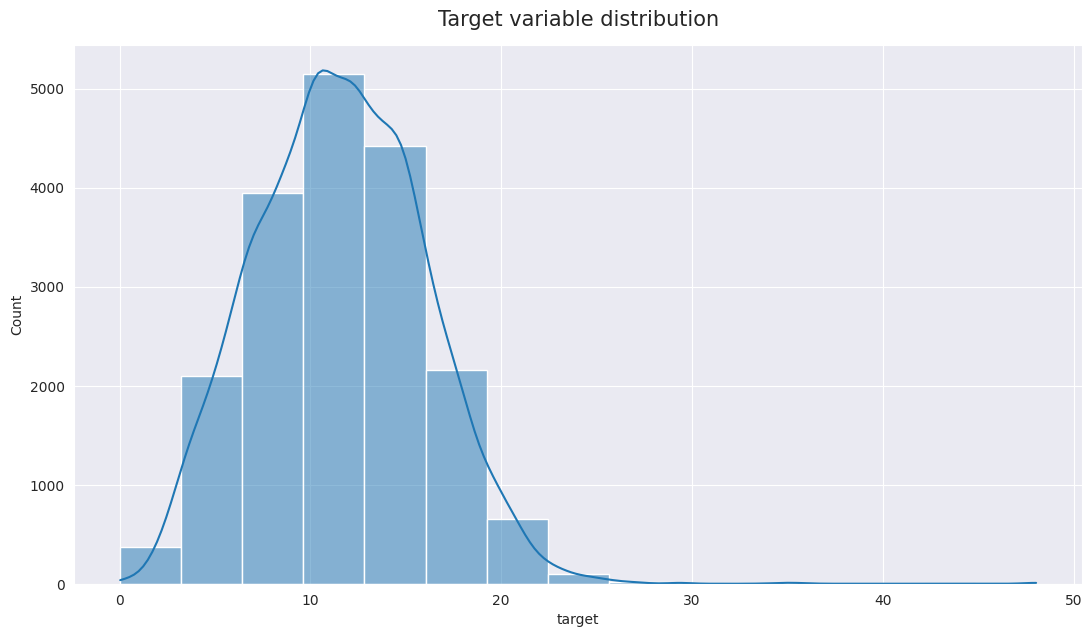

None

0.2833130025897702

In [11]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.target, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.target.skew())

The target variable is appears to be normally distributed but has a skew of ~0.28




## Outliers


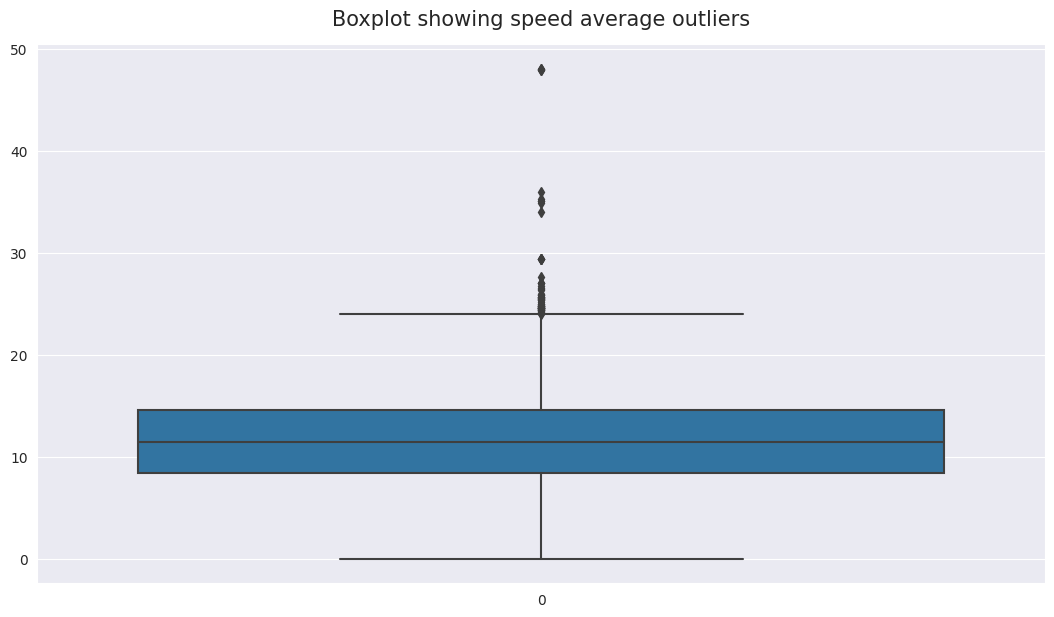

In [12]:
# Plotting boxplot for speed average
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(train.target)
plt.title('Boxplot showing speed average outliers', y = 1.02, fontsize = 15)
plt.show()

Outliers are those data points which differ significantly from other observations present in given dataset.

Suggestions on how to handle outliers:
 - Transforming the outliers by scaling - log transformation, box-cox transformation ...
 - Dropping outliers
 - Imputation by replacing outliers with mean, median ...



## Roads Visualisation

In [13]:
# Create a geopandas df
# convert the geometry column to a tuple
graph_df.geometry = graph_df.geometry.apply(lambda x: ast.literal_eval(x.replace(';', ',').replace('[', '(').replace(']', ')')))

# Create LineString objects from the tuples of coordinates
lines = [LineString(coords) for coords in graph_df['geometry']]

# Create a GeoDataFrame with LineString geometry
gdf = gpd.GeoDataFrame(graph_df, geometry=lines)

# Preview
gdf.head(2)

,can_bind_to_reverse_edge,category,country_isocode,edge_type,ends_with_crosswalk,ends_with_railroad_crossing,ends_with_toll_post,ends_with_traffic_light,geometry,has_masstransit_lane,is_in_poor_condition,is_paved,is_residential,is_restricted_for_trucks,is_toll,length,persistent_id,reverse_id,segments,speed_limit,struct_type,timezone,toponym,traffic_side
0,False,2,ZM,NamedRoad,False,False,False,False,"LINESTRING (28.26156 -15.60668, 28.26147 -15.60686)",False,False,True,False,False,False,23.00000,5344940802838670359,15027992219641331174,1,NaN,Road,Africa/Lusaka,Kafue Road,True
1,False,2,ZM,NamedRoad,False,False,False,False,"LINESTRING (28.26156 -15.60668, 28.26189 -15.60610, 28.26220 -15.60555, 28.26238 -15.60523)",False,False,True,False,False,False,182.30000,491469775135588157,2743429230199123364,3,NaN,Road,Africa/Lusaka,Kafue Road,True


### Visualise all the road sections in the provided dataset

In [14]:
# Create a Folium map centered at a specific location
map_center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=11)

# Iterate through the GeoDataFrame and add LineString objects to the map
for idx, row in gdf.iterrows():
    folium.GeoJson(row['geometry']).add_to(mymap)

# Display the map
mymap

### Visualise road sections in training and test datasets

In [15]:
train_copy = train[['persistent_id', 'target']]
train_copy ['dataset'] = 'train'
test_copy = test[['persistent_id']]
test_copy ['dataset'] = 'test'
train_test = pd.concat([train_copy, test_copy])
new_gdf = gdf.merge(train_test[['persistent_id', 'target', 'dataset']], how = 'left', on = ['persistent_id'])
new_gdf.head(2)

,can_bind_to_reverse_edge,category,country_isocode,edge_type,ends_with_crosswalk,ends_with_railroad_crossing,ends_with_toll_post,ends_with_traffic_light,geometry,has_masstransit_lane,is_in_poor_condition,is_paved,is_residential,is_restricted_for_trucks,is_toll,length,persistent_id,reverse_id,segments,speed_limit,struct_type,timezone,toponym,traffic_side,target,dataset
0,False,2,ZM,NamedRoad,False,False,False,False,"LINESTRING (28.26156 -15.60668, 28.26147 -15.60686)",False,False,True,False,False,False,23.00000,5344940802838670359,15027992219641331174,1,NaN,Road,Africa/Lusaka,Kafue Road,True,NaN,test
1,False,2,ZM,NamedRoad,False,False,False,False,"LINESTRING (28.26156 -15.60668, 28.26147 -15.60686)",False,False,True,False,False,False,23.00000,5344940802838670359,15027992219641331174,1,NaN,Road,Africa/Lusaka,Kafue Road,True,NaN,test


In [16]:
# Preview roads in train
new_gdf.toponym.value_counts(normalize = True)

Great East Road         0.19115
Kafue Road              0.18328
Great North Road        0.18154
Mumbwa Road             0.14983
Lusaka Bypass           0.13182
Lumumba Road            0.04262
Cairo Road              0.03450
Airport Road            0.02689
Linda Road              0.01725
Kalambo Road            0.01218
Independence Avenue     0.01066
Northend Roundabout     0.00406
Southend Roundabout     0.00406
Los Angeles Boulevard   0.00355
Church Road             0.00254
Thabo Mbeki Road        0.00101
Munali Road             0.00051
Chongwe Road            0.00051
Addis Ababa Drive       0.00051
Manchinchi Road         0.00051
Makishi Road            0.00051
Katima Mulilo Road      0.00051
Name: toponym, dtype: float64

In [17]:
# Visualise Munali Road
munali = new_gdf[new_gdf.toponym == 'Munali Road']

# Create a Folium map centered at a specific location
map_center = [munali.geometry.centroid.y.mean(), munali.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=20)

# Iterate through the GeoDataFrame and add LineString objects to the map
for idx, row in munali.iterrows():
    folium.GeoJson(row['geometry'], style_function=lambda feature: {'weight': 5}).add_to(mymap)

# Display the map
mymap

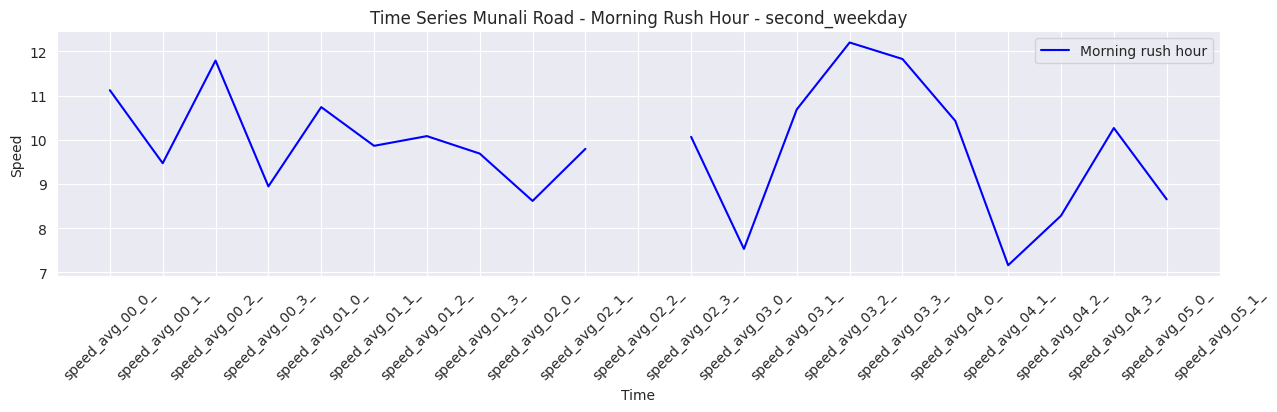

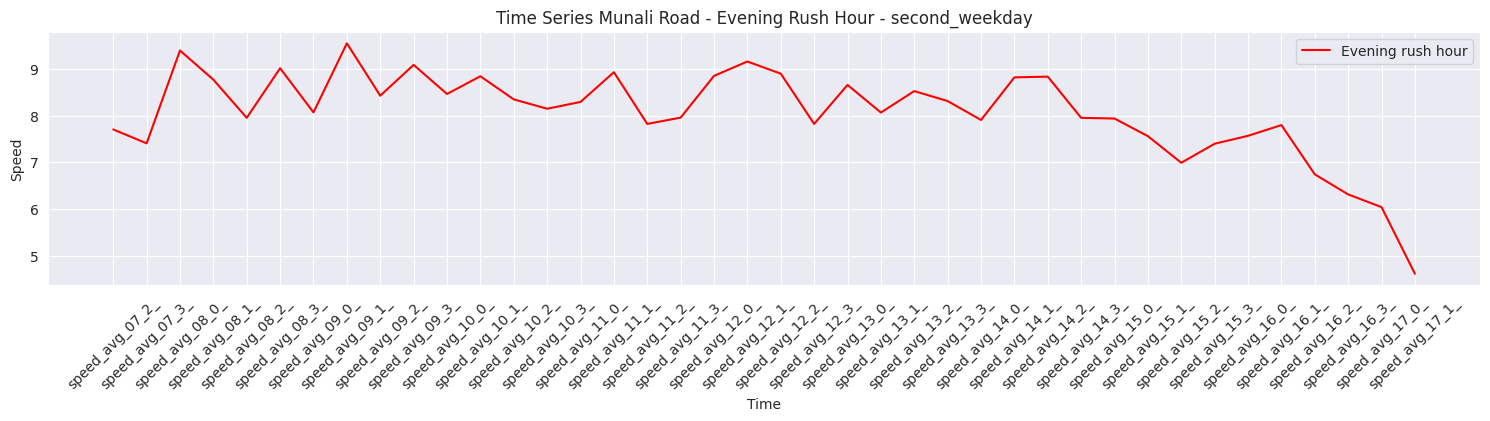

In [18]:
train_graph = train.merge(graph_df, how = 'left', on = 'persistent_id')
munali_road = train_graph[train_graph.toponym == 'Munali Road']

munali = munali_road[munali_road.day == 'second_weekday'][[x for x in munali_road.columns if x.startswith('speed_avg')]].T.reset_index()
munali.columns = ['time', 'evening_rush', 'morning_rush']
munali

plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.plot(munali['time'], munali['morning_rush'], color='blue', label='Morning rush hour')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Time Series Munali Road - Morning Rush Hour - second_weekday')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 2)
plt.plot(munali.iloc[22:62, :]['time'], munali.iloc[22:62, :]['evening_rush'], color='red', label='Evening rush hour')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Time Series Munali Road - Evening Rush Hour - second_weekday')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


## Missing values and duplicates

In [19]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(True, True)

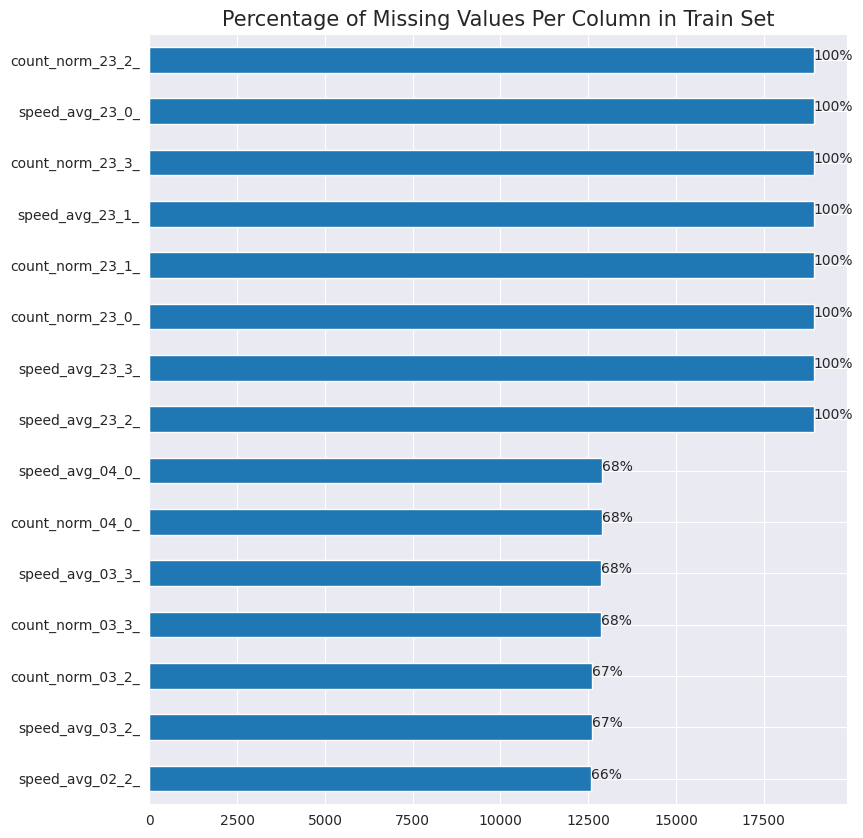

In [20]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Insights:
 - Most of the times there were no cars at midnight

Suggestions on how to handle missing values:
 - Fill in missing values with mode, mean, median..
 - Drop Missing datapoints with missing values
 - Fill in with a large number e.g -999999

In [21]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)


## Correlations

In [22]:
# Top 20 correlated features to the target
top20_corrs = abs(train.corr()['target']).sort_values(ascending = False).head(20)
top20_corrs

target            1.00000
speed_avg_16_2_   0.88104
speed_avg_17_0_   0.87564
speed_avg_16_3_   0.87460
speed_avg_16_1_   0.86148
speed_avg_17_1_   0.85579
speed_avg_19_2_   0.85221
speed_avg_19_3_   0.85077
speed_avg_15_2_   0.84872
speed_avg_14_2_   0.84814
speed_avg_15_1_   0.84410
speed_avg_15_3_   0.83995
speed_avg_15_0_   0.83573
speed_avg_13_1_   0.83532
speed_avg_20_0_   0.83500
speed_avg_13_2_   0.83420
speed_avg_14_3_   0.83354
speed_avg_16_0_   0.83301
speed_avg_13_3_   0.83202
speed_avg_14_1_   0.83140
Name: target, dtype: float64

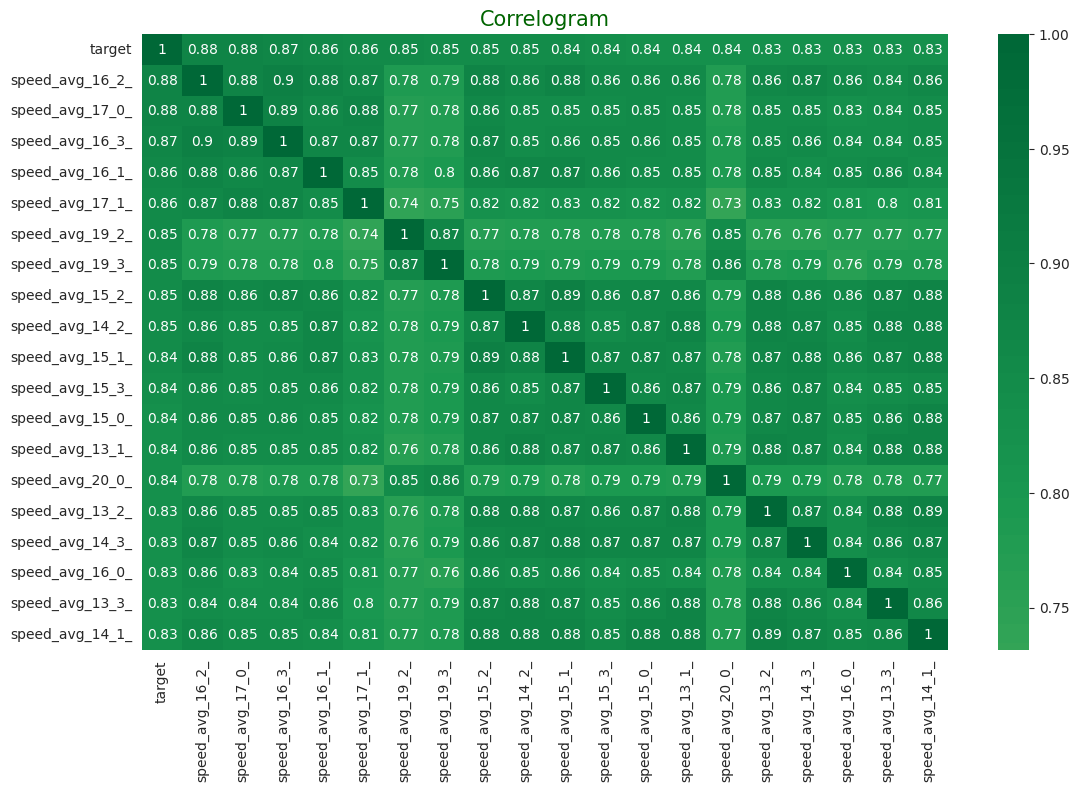

In [23]:
# Quantify correlations between features
corr = train[list(top20_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()


## Modelling

In [24]:
# Selecting the independent variables and the target variable

X = train.drop(['ID', 'persistent_id', 'day', 'prediction_type', 'target'], axis = 1).fillna(0)
y = train.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# Instantiating the model
clf = RandomForestRegressor(random_state = SEED, n_jobs=-1)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}') # 1.9784301975233811

RMSE Score: 1.9784301975233811


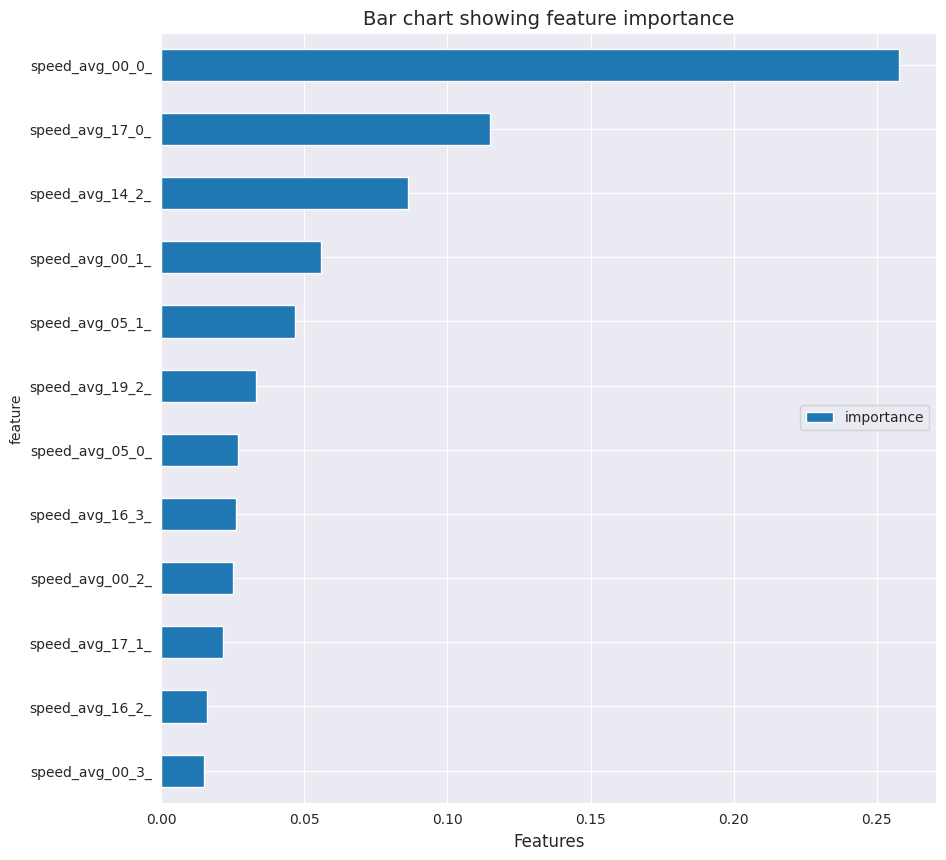

In [25]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()


## Making predictions of the test set and creating a submission file

In [26]:
# Make prediction on the test set
test_df = test.drop(['ID', 'persistent_id', 'day', 'prediction_type'], axis = 1).fillna(0)
predictions = clf.predict(test_df)

# # Create a submission file
sub_file = pd.DataFrame({'ID': test.ID, 'target': predictions})
sub_file.head()

,ID,target
0,5405080210124813414_X_second_weekday_X_evening_rush_hour,10.93323
1,6453542591505456860_X_last_weekday_X_evening_rush_hour,7.97193
2,6407212708693425720_X_first_holiday_X_evening_rush_hour,14.77620
3,6760475269129354863_X_last_weekday_X_morning_rush_hour,15.35435
4,1401737811576794421_X_first_holiday_X_evening_rush_hour,13.48021


In [27]:
# Create file
sub_file.to_csv('BaselineSubmission.csv', index = False) # Download subfile and submit to zindi for scoring

## ALL THE BEST AND HAVE FUN &#x1F60E;